##Participantes do Grupo:

#### Andreza Oliveira
#### Camila Maria de Oliveira Lima
#### Livia Nobre
#### Mateus Idibal
#### Thiago Barbosa

#### Descrição do problema

Uma posição _volátil_, no futebol (tanto no Brasil quanto fora), é a posição de técnico. Uma prática comum é substituir o treinador após alguns resultados negativos. Naturalmente, um time que não troca o técnico não é garantia de sucesso no campeonato. Assim, surge a dúvida: será que, **em geral**, times com técnicos mais longevos ficam em uma posição melhor na tabela, no fim do campeonato?

# Estatística no futebol

### A duração de um técnico, no futebol, influencia na posição final do campeonato?



Para acessar os valores, basta olhar os nomes presentes nas linhas e colunas. Por exemplo: dados[2][1]. Vale lembrar que os 'índices' podem ser strings também.

#### Dados

Para _atacar_ esse problema, será disponibilizado um arquivo json com todos os dados do Campeonato Brasileiro de 2019. Para ler um arquivo json, basta importar o módulo 'pandas' com o comando:  ```import pandas as pd```. Para ler um arquivo json, utilize o método:  
```dados = pd.read_json('nome_do_arquivo.json') ```

#### Resultado esperado

Ao fim do projeto, deverá ter os dados da posição final do time e do tempo (em número de rodadas) que o técnico mais longevo ficou. Por exemplo, o técnico do 1º colocado ficou 32 rodadas, do 2º ficou 37, do 3º 29, assim por diante. Essas dados podem ser armazenados em uma estrutura de dados de sua escolha

Com esses dados, utilizar o código abaixo para fazer um gráfico simples (x é a posição final e y o tempo do técnico mais longevo):


#### Observação: Trabalho em grupo de, no mínimo, 5 pessoas e máximo, 8 pessoas.

In [1]:
#Importando a biblioteca Pandas
import pandas as pd
import numpy as np

In [2]:
# ler os dados do json
# orient 'index' é o formato do json
dados = pd.read_json('brasileirao-2019.json', orient='index')

In [3]:
# Função que verifica quantos pontos recebe um time em cada jogo
def resultado_rodada(resultado):
    if resultado['ganhou']:
        return 3
    elif resultado['empate']:
        return 1
    else:
        return 0

In [4]:
#Criando uma lista com os resultados
resultados = []

#Percorrendo o índice e cada linha do json
for index, row in dados.iterrows():

    # Percorrendo todas as Rodadas
    for i in range(0,10):
      jogo = row[i]

      # Percorrendo os Jogos de Home e Away
      time_1 = {
          'jogo': i,
          'rodada': index,
          'clube': jogo['clubs']['home'],
          'ganhou': (int(jogo['goals']['home']) > int(jogo['goals']['away'])),
          'empate': (int(jogo['goals']['home']) == int(jogo['goals']['away'])),
          'perdeu': (int(jogo['goals']['home']) < int(jogo['goals']['away'])),
          'coach': jogo['coach']['home'],
      }
      time_1['pontos'] = resultado_rodada(time_1)
      resultados.append(time_1)

      time_2 = {
          'jogo': i,
          'rodada': index,
          'clube': jogo['clubs']['away'],
          'ganhou': (int(jogo['goals']['home']) < int(jogo['goals']['away'])),
          'empate': (int(jogo['goals']['home']) == int(jogo['goals']['away'])),
          'perdeu': (int(jogo['goals']['home']) > int(jogo['goals']['away'])),
          'coach': jogo['coach']['away'],
      }
      time_2['pontos'] = resultado_rodada(time_2)
      resultados.append(time_2)

In [5]:
#Criando um dataframe dos resultados obtidos
df = pd.DataFrame.from_records(resultados)

In [6]:
#Criando uma variável e agrupando os valores de time e técnico
clubes_coach = df.groupby(['clube','coach'])

In [7]:
#Criando uma variável e agrupando os valores de time
clubes = df.groupby(['clube'])

In [8]:
#Criando uma variável com a soma dos pontos e ordenando decrescente os times
y = clubes['pontos'].sum().sort_values(ascending=False)

In [9]:
#Criando uma variável filtrando o técnico e o número de rodadas
x = clubes_coach[['rodada']].count()

In [10]:
x

rodada
clube         coach                            
Athletico-PR  E. de Barros                    8
              T. Retzalff Nunes              30
Atlético-MG   R. Marques Santana             25
              V. Carmo Mancini               13
Avaí          A. Valentim do Carmo Neto      15
              E. Machado Souto                9
              E. Spinassé Camillato          14
Bahia         R. Machado Marques             38
Botafogo      A. Valentim do Carmo Neto      13
              B. Lazaroni                     2
              E. de Souza Barroca            23
CSA           A. Fucks                       26
              G. Santos Vasconcelo            3
              M. Ribeiro Cabo                 9
Ceará SC      A. Batista                     13
              A. Fucks                        3
              E. Alves Moreira               22
Chapecoense   E. Hartkopp                     8
              M. dos Santos Gonçalves        19
              N. da Silveira Júnior          11
Corinthians   Coelho                          8
              F. Carille                     30
Cruzeiro      A. Batista                      3
              A. da Silva Braga              14
              L. Venker de Menezes           13
              R. Alves Resende                1
              R. Ceni                         7
Flamengo      A. da Silva Braga               6
              J. Pinheiro de Jesus           28
              J. Pires de Deus                1
              M. Salles                       3
Fluminense    F. Diniz Silva                 15
              M. de Oliveira                 17
              O. de Oliveira Filho            6
Fortaleza     C. A. P. F. Hembert             1
              J. Mannarino                    7
              M. Montenegro                   1
              R. Ceni                        29
Goiás         C. dos Santos Oliveira         12
              N. da Silveira Júnior          25
              R. L. Martins Gomes             1
Grêmio        Renato Gaúcho                  38
Internacional J. Mannarino                   11
              O. Hellmann                    24
              R. Colbachini                   3
Palmeiras     A. Lopes dos Santos             2
              L. Scolari                     16
              L. Venker de Menezes           20
Santos        J. Sampaoli Moya               38
São Paulo     A. Stival                      21
              F. Diniz Silva                 16
              M. Longo de Araújo              1
Vasco da Gama M. Gomes Valadares              4
              V. Luxemburgo da Silva         34

In [11]:
#Criando um dicionário com os técnicos e a quantidade de rodadas que ficou
max_tecnico = {}

# Criando um for pegando os valores de time e técnico passando por todas as rodadas
for (time, coach), v in x['rodada'].items():
  # criando a chave pegando os valores de time e técnico
  key = f'{time}-{coach}'
  # setdefault() método retorna o valor do item com a chave especificada ou criando uma chave com um dicionário vazio
  max_tecnico.setdefault(time, {})

  max_tecnico[time]['pontos'] = y[time]
  #pegando os valores de rodadas e técnico
  max_tecnico[time].setdefault('rodadas', v)
  max_tecnico[time].setdefault('coach', coach)

  #Fazendo um comparativo entre os técnicos e selecionando o técnico que ficou em mais rodadas no time
  _y = max_tecnico[time]['rodadas']
  if v > _y:
    max_tecnico[time]['rodadas'] = v
    max_tecnico[time]['coach'] = coach



In [12]:
#Criando o dataframe com o técnico, quantidade de rodadas que ficou no time e ordenando pelos pontos do time

df_result = pd.DataFrame.from_records(
    [
        {
            'tecnico': f"{v['coach']} do **{k}**",
            'rodadas': v['rodadas'],
            'pontos': v['pontos']

        }
        for k, v in max_tecnico.items()
    ]
).sort_values('pontos', ascending=True)


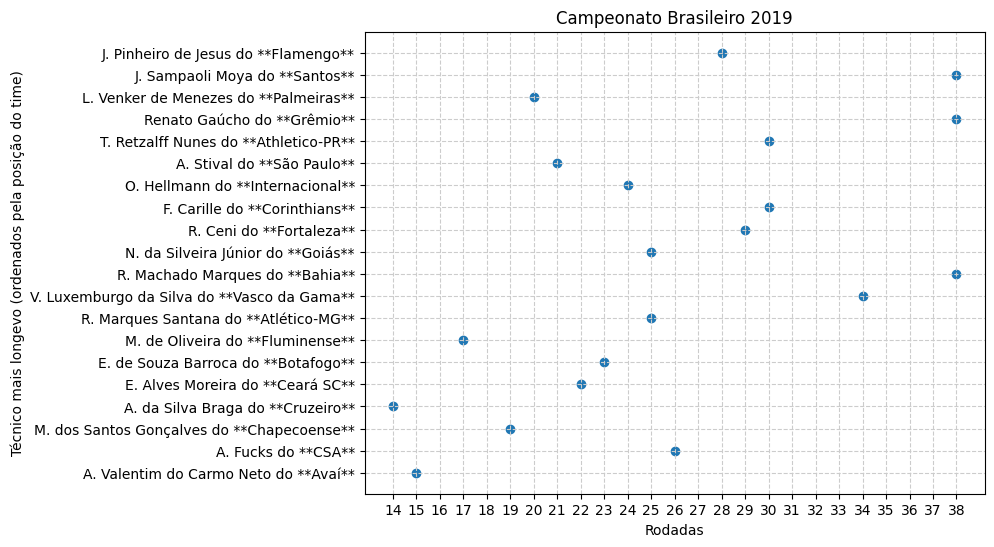

In [13]:
import matplotlib.pyplot as plt


X = df_result.rodadas
Y = df_result.tecnico

# Criando o gráfico com a importação sugerida no projeto
plt.figure(figsize=(8,6))
plt.title('Campeonato Brasileiro 2019')
plt.scatter(X, Y)
plt.xlabel('Rodadas')
plt.ylabel('Técnico mais longevo (ordenados pela posição do time)')
plt.xscale('linear')
plt.grid(color='#ccc', linestyle='--')
plt.xticks(np.arange(min(X), max(X)+1, 1.0))

plt.show()

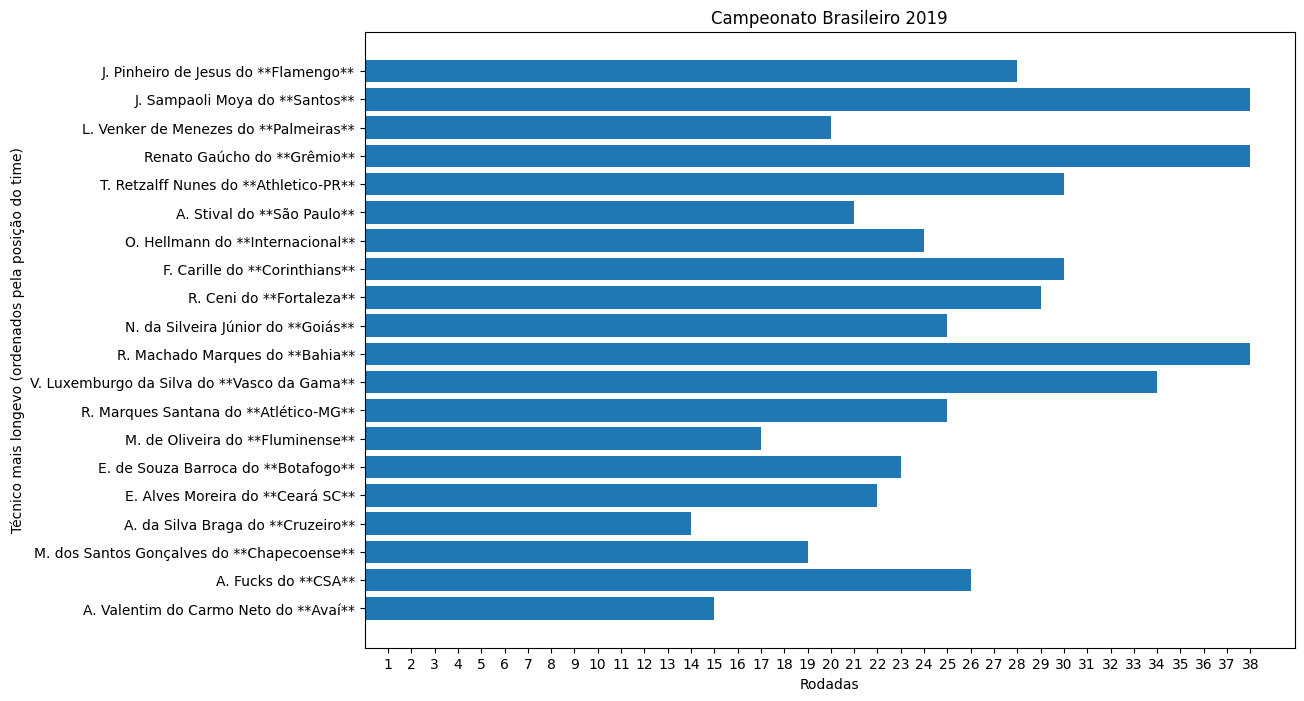

In [14]:
X = df_result.rodadas
Y = df_result.tecnico

plt.figure(figsize=(12,8))
plt.title('Campeonato Brasileiro 2019')
#Criando um gráfico de barras para visualizar melhor os resultados
plt.barh(Y, X)
plt.xlabel('Rodadas')
plt.ylabel('Técnico mais longevo (ordenados pela posição do time)')
plt.xscale('linear')
plt.xticks(np.arange(1, max(X)+1, 1.0))

plt.show()

# Conclusão

#### * Dessa forma podemos concluir que grande parte dos técnicos tem uma média de 14 a 24 rodadas, ocorrendo alguns casos de outliers que o técnico ficou acima da média.

#### * Outro ponto que observamos que os técnicos que permaneceram por mais tempo, conseguiram deixar o time em uma posição razoável.

#### * Os times Santos, Grêmio e Bahia competiram o campeonato todo com o mesmo técnico. Obtiveram segundo, quarto e décimo primeiro.
#### * Algumas exceções como o Palmeiras, apesar do técnico ter ficado somente 20 rodadas conseguiu garantir a terceira posição para o time.
